<a href="https://colab.research.google.com/github/ArifAygun/CustomerEye/blob/main/Company_Reviews(Master2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### IMPORT LIBRARIES AND DATASET

In [23]:
!pip install pycountry
!pip install emoji

In [24]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates

import pycountry
from wordcloud import WordCloud
from collections import Counter
import emoji

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Analysis_1/

# Read CSV files into DataFrames
df1 = pd.read_csv('Freedom_Debt_Relief2.csv')
df2 = pd.read_csv('Millennium_Trust2.csv')
df3 = pd.read_csv('Advance_America2.csv')

print(df1.info(), df1.head())
print(df2.info(), df2.head())
print(df3.info(), df3.head())

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Analysis_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2000 non-null   float64
 1   Experience Date  2000 non-null   object 
 2   Review Date      2000 non-null   object 
 3   Reply Date       2000 non-null   object 
 4   Exp to Review    2000 non-null   int64  
 5   Review to Reply  2000 non-null   int64  
 6   Rating           2000 non-null   int64  
 7   Countries        2000 non-null   object 
 8   Reviews          2000 non-null   object 
 9   Replies          2000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 156.4+ KB
None      Year Experience Date Review Date  Reply Date  Exp to Review  \
0  2021.0      2021-04-30  2021-04-30 

## TEXT PREPROCESSING

In [26]:
def preprocess_text_for_sentiment_analysis(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Handle emojis
    words = [emoji.demojize(word, delimiters=('', ' ')) for word in words]

    # Join tokens back into a string
    cleaned_text = ' '.join(words)

    return cleaned_text


# Apply the preprocessing function to the "Reviews" column in each DataFrame
df1['Cleaned_Reviews'] = df1['Reviews'].apply(preprocess_text_for_sentiment_analysis)
df2['Cleaned_Reviews'] = df2['Reviews'].apply(preprocess_text_for_sentiment_analysis)
df3['Cleaned_Reviews'] = df3['Reviews'].apply(preprocess_text_for_sentiment_analysis)

# Display the cleaned data
print("Cleaned DataFrame 1:")
print(df1[['Reviews', 'Cleaned_Reviews']].head())

print("\nCleaned DataFrame 2:")
print(df2[['Reviews', 'Cleaned_Reviews']].head())

print("\nCleaned DataFrame 3:")
print(df3[['Reviews', 'Cleaned_Reviews']].head())


Cleaned DataFrame 1:
                                             Reviews  \
0  FDR OVERSIGHT I typically would give FDR a 5 s...   
1  Freedom has really helped with my debt… Freedo...   
2  Everything is following through just as… Every...   
3  Started the program owing a little… Started th...   
4  I was surprised to have a settlement so… I was...   

                                     Cleaned_Reviews  
0  fdr oversight typically would give fdr star ra...  
1  freedom really helped debt freedom really help...  
2  everything following everything following expl...  
3  started program owing little started program o...  
4  surprised settlement surprised settlement quickly  

Cleaned DataFrame 2:
                                             Reviews  \
0                  Website was easy to navigate. nan   
1                           5 star Excellent service   
2  Moving monies Getting all my investments in on...   
3  The service was excellent The service was exce...   
4  User Fr

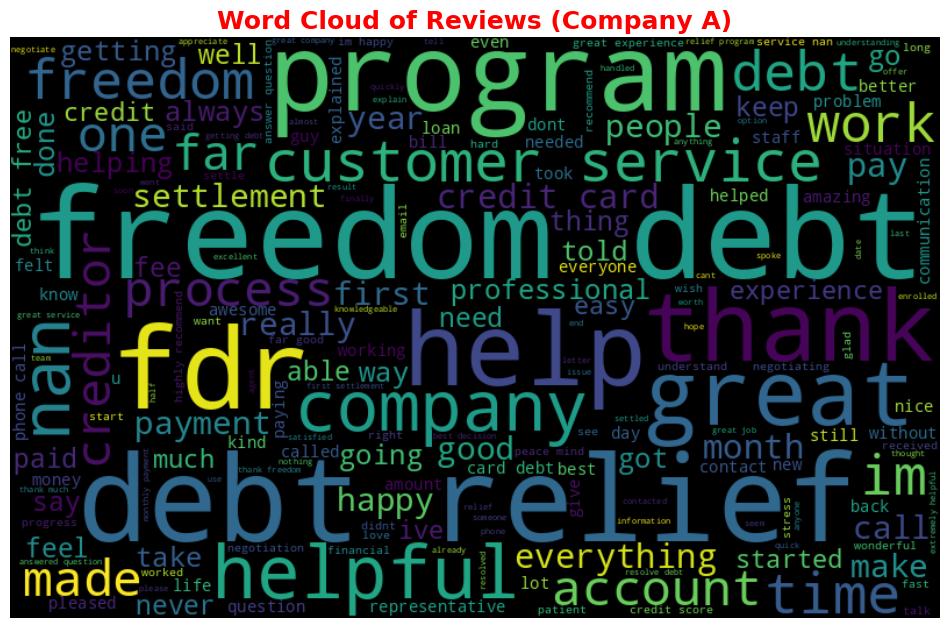

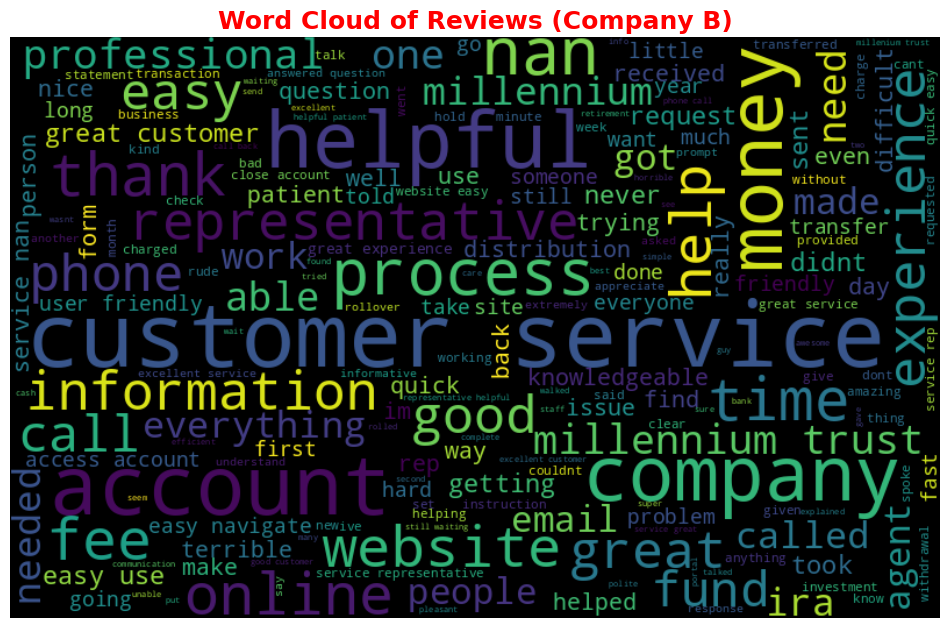

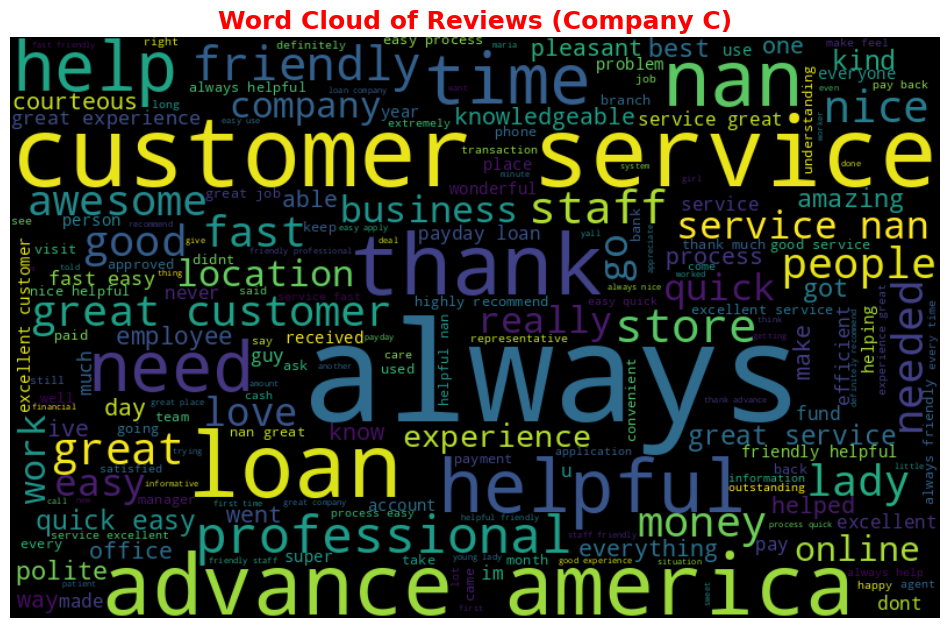

In [28]:

import matplotlib.pyplot as plt

# Function to generate and display word cloud
def generate_and_display_wordcloud(data, title):
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=500).generate(' '.join(data.dropna()))

    # Sort the word cloud in descending order
    sorted_wordcloud = dict(sorted(wordcloud.words_.items(), key=lambda item: item[1], reverse=True))

    # Get the top 30 results
    top_30 = dict(list(sorted_wordcloud.items())[:30])

    # Create a figure with the specified title
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # Set the title with custom font size and weight
    plt.title(title, fontsize=18, fontweight='bold', color='red')

    # Show the word cloud
    plt.show()

# Apply the function to your DataFrames
generate_and_display_wordcloud(df1['Cleaned_Reviews'], 'Word Cloud of Reviews (Company A)')
generate_and_display_wordcloud(df2['Cleaned_Reviews'], 'Word Cloud of Reviews (Company B)')
generate_and_display_wordcloud(df3['Cleaned_Reviews'], 'Word Cloud of Reviews (Company C)')


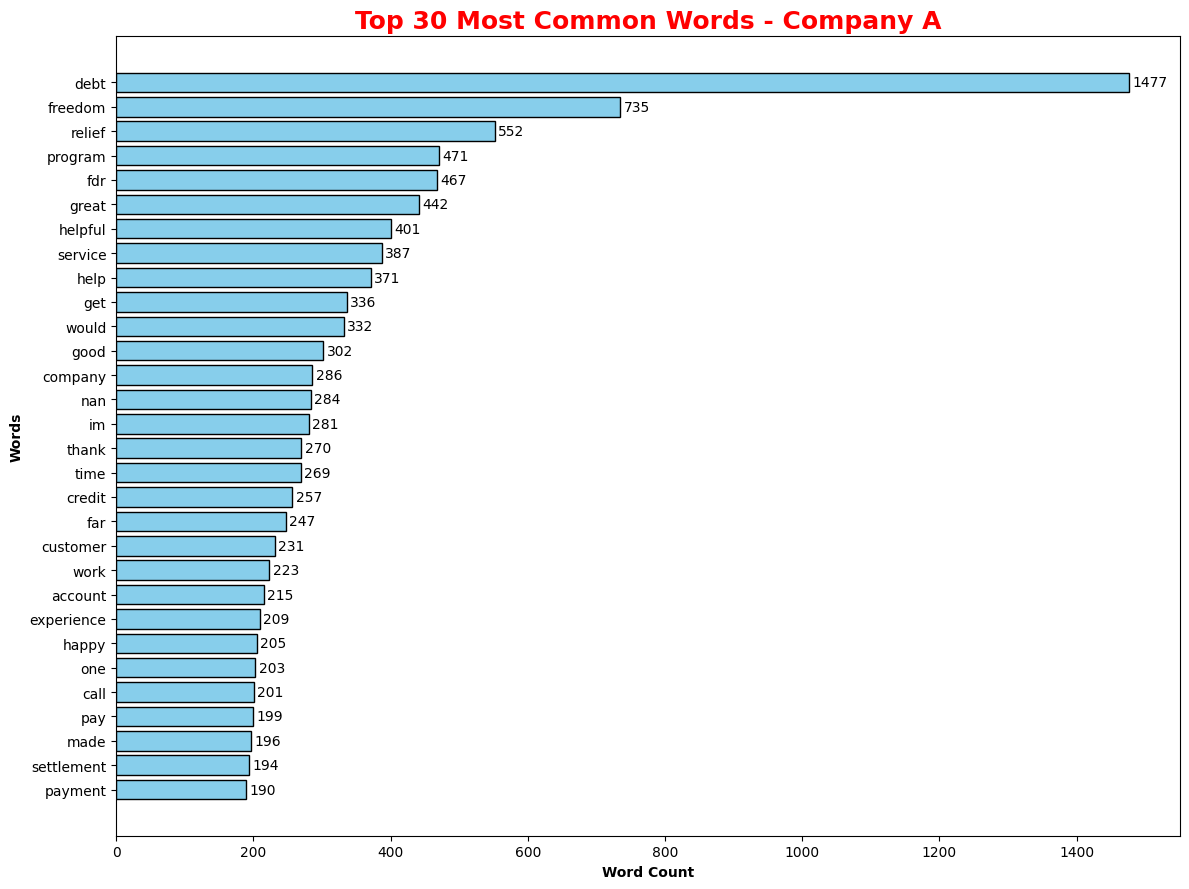

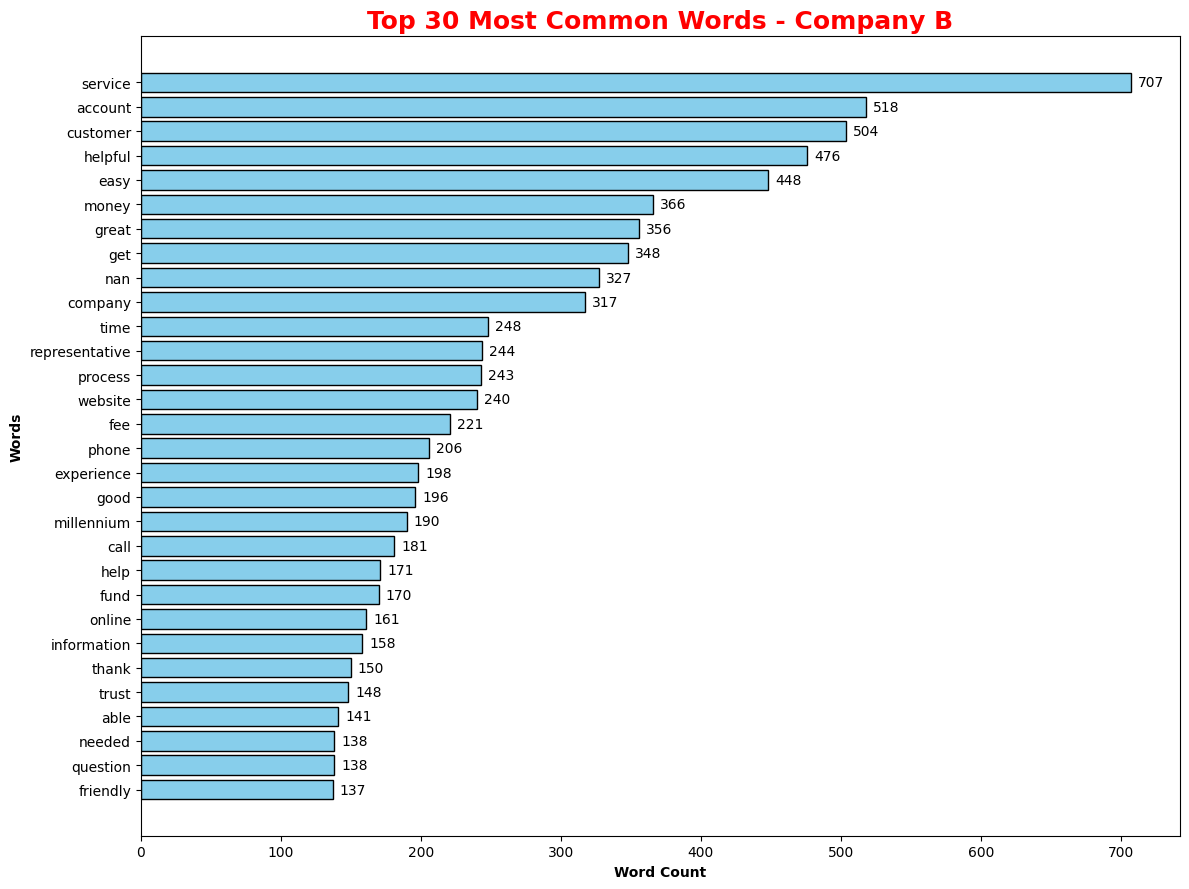

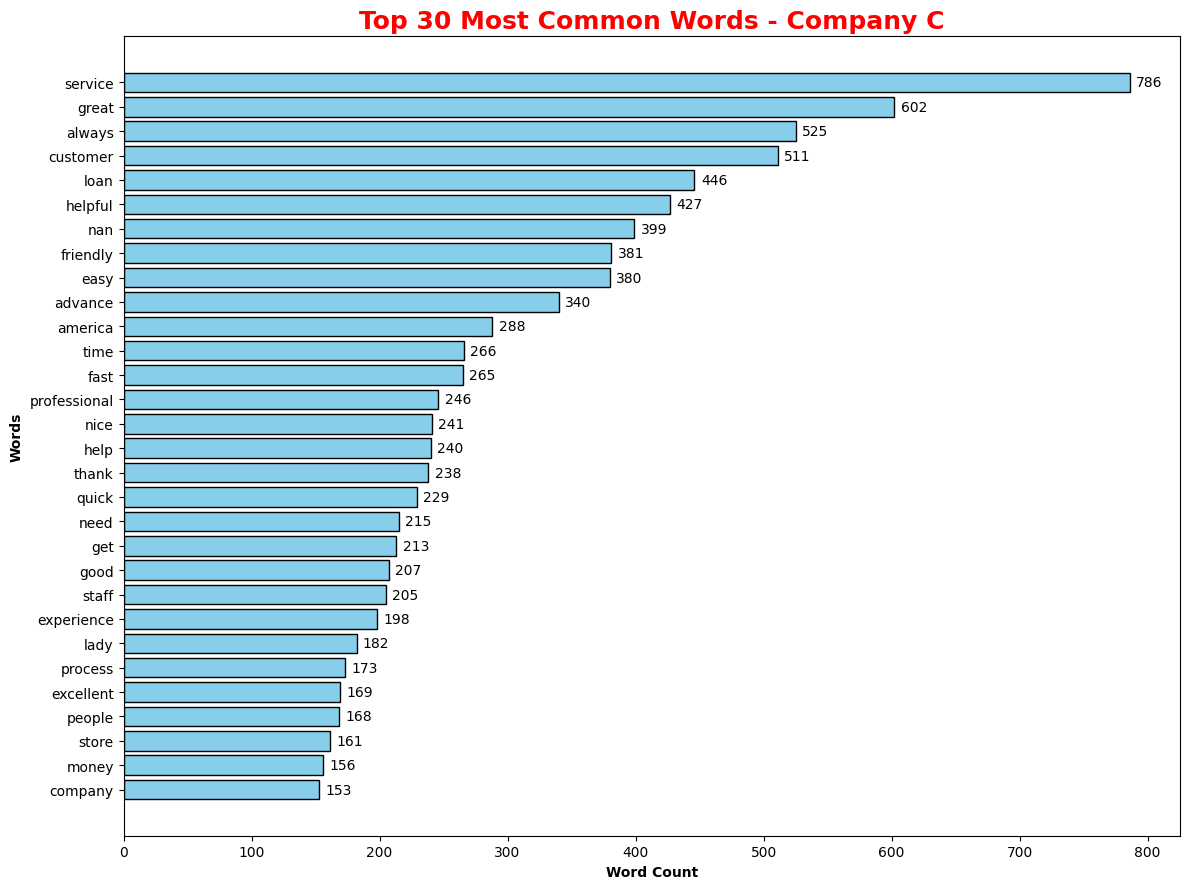

In [31]:
from collections import Counter
import matplotlib.pyplot as plt

# Function to calculate word counts, display the top 30 words, and create a bar chart
def calculate_display_and_chart_word_counts(data, title, top_n=30, bar_color='skyblue'):
    # Concatenate and split the text, handling NaN values
    all_words = ' '.join(str(text) for text in data if pd.notna(text)).split()

    # Count the occurrences of each word
    word_counts = Counter(all_words)

    # Sort the word counts in descending order
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

    # Create a DataFrame for the first 30 most common words
    word_counts_df = pd.DataFrame(list(sorted_word_counts.items()), columns=['Word', 'Count'])

    # Display the top 30 words
    #print(f"\nTop 30 words for {title}:")
    #print(word_counts_df.head(30))

    # Create a horizontal bar chart for the top 30 words
    top_words = list(sorted_word_counts.keys())[:top_n]
    top_word_counts = list(sorted_word_counts.values())[:top_n]

    # Create a horizontal bar chart with better readability
    plt.figure(figsize=(12, 9))
    bars = plt.barh(top_words, top_word_counts, color=bar_color, edgecolor='black', height=0.8)

    # Add data values on each bar
    for bar, count in zip(bars, top_word_counts):
        plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10, color='black')

    # Set axis labels and invert the y-axis for better readability
    plt.xlabel('Word Count', fontweight='bold')
    plt.ylabel('Words', fontweight='bold')
    plt.gca().invert_yaxis()

    # Add a title with specified properties
    plt.title(f'Top {top_n} Most Common Words - {title}', fontsize=18, fontweight='bold', color='red')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Apply the function to your DataFrames
calculate_display_and_chart_word_counts(df1['Cleaned_Reviews'], 'Company A')
calculate_display_and_chart_word_counts(df2['Cleaned_Reviews'], 'Company B')
calculate_display_and_chart_word_counts(df3['Cleaned_Reviews'], 'Company C')
